In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

import pandasql as sql

In [2]:
#load the claims data
mytrain=pd.read_csv(r"C:\Users\Dlc\Desktop\train.csv",header=0)
mytest=pd.read_csv(r"C:\Users\Dlc\Desktop\test.csv",header=0)
mytrain_bk1=mytrain.copy()

mytrain.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
68969,0x1aa1f,CUS_0x5338,February,Scotty,37,109-33-6582,Teacher,17288.425,NaN,4,3,2,1,Home Equity Loan,3,12,5.83,4.0,Good,1159.18,36.890595,31 Years and 6 Months,NM,8.647233,146.92804183758315,Low_spent_Medium_value_payments,277.4949331926432,Good
48834,0x13424,CUS_0x895d,March,Soyoung Kimg,32,850-31-2772,Writer,30638.93,2801.244167,5,6,16,4,"Credit-Builder Loan, Mortgage Loan, Payday Loa...",14,13,0.64,1.0,Standard,1472.21,37.035239,16 Years and 7 Months,Yes,74.632924,159.36311369540863,!@9#%8,336.1283792031544,Standard
32561,0xd4cb,CUS_0x9ab4,February,Chavez-Dreyfusse,35,969-17-4818,Scientist,96650.64,NaN,3,7,12,4,"Home Equity Loan, Auto Loan, Personal Loan, an...",27,14,2.18,2.0,Standard,1326.64,29.751208,32 Years and 4 Months,No,223.150560,125.08283328962914,High_spent_Large_value_payments,711.488606859542,Standard
94119,0x23d79,CUS_0x631d,August,Cableu,2090,591-97-3475,Mechanic,8830.81,489.436022,10,5,33,9,"Not Specified, Personal Loan, Personal Loan, P...",15,19,1.6399999999999997,14.0,Bad,3587.45,30.508233,4 Years and 6 Months,Yes,93.497580,40.05424645077528,Low_spent_Small_value_payments,251.0030681539398,Poor
98944,0x259c2,CUS_0x9efc,January,NaN,27,168-85-8251,Accountant,33418.55,NaN,6,3,5,2,"Student Loan, and Payday Loan",11,16,16.98,4.0,Standard,415.34,23.407516,10 Years and 5 Months,NM,37.632330,338.0765879937914,Low_spent_Small_value_payments,188.278999,Standard
37966,0xf474,CUS_0xb8eb,July,David Ingramr,32,818-38-8989,Developer,45243.21,3855.267500,7,7,21,3,"Not Specified, Mortgage Loan, and Student Loan",61,24,0.9,6.0,_,2482.56,32.008078,13 Years and 7 Months,NM,89.296816,389.73025583887403,!@9#%8,196.4996782056552,Poor
50096,0x13b8a,CUS_0x3db1,January,Timz,43,091-80-2935,Journalist,35871.7,3131.308333,3,6,6,-100,Personal Loan,17,3,7.87,0.0,Good,176.96,37.714190,27 Years and 4 Months,No,24.574642,115.48386984778186,Low_spent_Small_value_payments,463.07232102435927,Poor
30943,0xcb4d,CUS_0x667a,August,Josephn,34,072-36-2011,Teacher,32045.78,2677.481667,6,9,30,7,"Not Specified, Auto Loan, Student Loan, Home E...",10,13,17.19,11.0,Standard,1333.18,37.519045,6 Years and 9 Months,Yes,169.770374,54.02723161906525,High_spent_Large_value_payments,283.9505611450192,Poor
40463,0x10315,CUS_0x1cc4,August,Xinc,47,541-42-6554,Lawyer,45034.34,4021.861667,4,7,8,2,"Home Equity Loan, and Mortgage Loan",7,13,6.3,0.0,Good,36.56,26.657627,23 Years and 5 Months,No,33977.000000,139.08298597912366,High_spent_Medium_value_payments,464.37678690976713,Good
95685,0x246a7,CUS_0xc0ff,June,Emmanuel Olaoyeb,19_,208-90-1240,Writer,12941.135,NaN,5,4,20,7,"Personal Loan, Student Loan, Debt Consolidatio...",19,10,7.19,7.0,Standard,219.36,33.446098,11 Years and 10 Months,Yes,67257.000000,103.10153292232329,Low_spent_Small_value_payments,232.0903365470759,Poor


In [3]:
mytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
mytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [5]:
mytrain=mytrain.drop(columns=["ID","Customer_ID","Name","Credit_History_Age","SSN"],axis=1)

In [6]:
mytest=mytest.drop(columns=["ID","Customer_ID","Name","Credit_History_Age","SSN"],axis=1)

In [7]:
mytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [8]:
mytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Type_of_Loan              44296 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  object 
 12  Changed_Credit_Limit      50000 non-null  object 
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
#balancing and imbalancing
Credit_Score_count = mytrain.Credit_Score.value_counts()
print('Class 0:', Credit_Score_count[0])
print('Class 1:', Credit_Score_count[1])
print('proportion:',round(Credit_Score_count[0]/Credit_Score_count[1],2),':1')
print('total bank records:',len(mytrain))

Class 0: 53174
Class 1: 28998
proportion: 1.83 :1
total bank records: 100000


In [11]:
print(mytrain['Month'].value_counts())
mytrain['Month']=le.fit_transform(mytrain['Month'])

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


In [12]:
print(mytest['Month'].value_counts())
mytest['Month']=le.fit_transform(mytest['Month'])

September    12500
October      12500
November     12500
December     12500
Name: Month, dtype: int64


In [13]:
print(mytrain['Occupation'].value_counts())
mytrain['Occupation']=le.fit_transform(mytrain['Occupation'])

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [14]:
print(mytest['Occupation'].value_counts())
mytest['Occupation']=le.fit_transform(mytest['Occupation'])

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64


In [15]:
mytrain['Annual_Income']=le.fit_transform(mytrain['Annual_Income'])

In [16]:
mytest['Annual_Income']=le.fit_transform(mytest['Annual_Income'])

In [17]:
mytrain['Monthly_Inhand_Salary']=mytrain['Monthly_Inhand_Salary'].fillna(mytrain['Monthly_Inhand_Salary'].mean())

In [18]:
mytest['Monthly_Inhand_Salary']=mytest['Monthly_Inhand_Salary'].fillna(mytest['Monthly_Inhand_Salary'].mean())

In [19]:
mytrain['Num_of_Loan']=le.fit_transform(mytrain['Num_of_Loan'])

In [20]:
mytest['Num_of_Loan']=le.fit_transform(mytest['Num_of_Loan'])

In [21]:
mytrain=mytrain.drop('Type_of_Loan',axis=1)

In [22]:
mytest=mytest.drop('Type_of_Loan',axis=1)

In [23]:
print(mytrain['Num_of_Delayed_Payment'].value_counts())
mytrain=mytrain.drop('Num_of_Delayed_Payment',axis=1)

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64


In [24]:
print(mytest['Num_of_Delayed_Payment'].value_counts())
mytest=mytest.drop('Num_of_Delayed_Payment',axis=1)

19      2622
15      2594
18      2570
16      2548
17      2545
        ... 
288        1
3556       1
3393       1
4351       1
2034       1
Name: Num_of_Delayed_Payment, Length: 443, dtype: int64


In [25]:
mytrain['Changed_Credit_Limit']=le.fit_transform(mytrain['Changed_Credit_Limit'])

In [26]:
mytest['Changed_Credit_Limit']=le.fit_transform(mytest['Changed_Credit_Limit'])

In [27]:
mytrain['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [28]:
mytest['Num_Credit_Inquiries'].value_counts()

5.0       4709
4.0       4402
6.0       4375
7.0       4295
8.0       3922
          ... 
1471.0       1
307.0        1
1326.0       1
904.0        1
352.0        1
Name: Num_Credit_Inquiries, Length: 750, dtype: int64

In [29]:
mytrain['Num_Credit_Inquiries']=mytrain['Num_Credit_Inquiries'].fillna(4.0)

In [30]:
mytest['Num_Credit_Inquiries']=mytest['Num_Credit_Inquiries'].fillna(4.0)

In [31]:
mytrain['Credit_Mix']=le.fit_transform(mytrain['Credit_Mix'])

In [32]:
mytest['Credit_Mix']=le.fit_transform(mytest['Credit_Mix'])

In [33]:
mytrain['Outstanding_Debt']=le.fit_transform(mytrain['Outstanding_Debt'])

In [34]:
mytest['Outstanding_Debt']=le.fit_transform(mytest['Outstanding_Debt'])

In [35]:
mytrain['Payment_of_Min_Amount']=le.fit_transform(mytrain['Payment_of_Min_Amount'])

In [36]:
mytest['Payment_of_Min_Amount']=le.fit_transform(mytest['Payment_of_Min_Amount'])

In [37]:
print(mytrain['Amount_invested_monthly'].value_counts())
mytrain['Amount_invested_monthly']=mytrain['Amount_invested_monthly'].fillna(mytrain['Amount_invested_monthly'].mode())

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64


In [38]:
print(mytest['Amount_invested_monthly'].value_counts())
mytest['Amount_invested_monthly']=mytest['Amount_invested_monthly'].fillna(mytest['Amount_invested_monthly'].mode())

__10000__             2175
0.0                    106
236.64268203272135       1
160.0977166999812        1
320.4566446914704        1
                      ... 
197.2171314766754        1
366.23148415217315       1
34.89940643392877        1
256.90830529853173       1
220.45787812168732       1
Name: Amount_invested_monthly, Length: 45450, dtype: int64


In [39]:
mytrain['Amount_invested_monthly']=le.fit_transform(mytrain['Amount_invested_monthly'])

In [40]:
mytest['Amount_invested_monthly']=le.fit_transform(mytest['Amount_invested_monthly'])

In [41]:
mytrain['Payment_Behaviour']=le.fit_transform(mytrain['Payment_Behaviour'])

In [42]:
mytest['Payment_Behaviour']=le.fit_transform(mytest['Payment_Behaviour'])

In [43]:
mytrain=mytrain.drop('Monthly_Balance',axis=1)

In [44]:
mytest=mytest.drop('Monthly_Balance',axis=1)

In [45]:
mytrain['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [46]:
mytrain['Credit_Score']=le.fit_transform(mytrain['Credit_Score'])

In [47]:
mytrain['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [48]:
mytrain.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [49]:
mytest.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
dtype: int64

In [50]:
mytrain=mytrain.drop('Age',axis=1)

In [51]:
mytest=mytest.drop('Age',axis=1)

In [52]:
mytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Occupation                100000 non-null  int32  
 2   Annual_Income             100000 non-null  int32  
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int32  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Changed_Credit_Limit      100000 non-null  int32  
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  int32  
 12  Outstanding_Debt          100000 non-null  int32  
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [53]:
mytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int32  
 1   Occupation                50000 non-null  int32  
 2   Annual_Income             50000 non-null  int32  
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int32  
 8   Delay_from_due_date       50000 non-null  int64  
 9   Changed_Credit_Limit      50000 non-null  int32  
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Credit_Mix                50000 non-null  int32  
 12  Outstanding_Debt          50000 non-null  int32  
 13  Credit_Utilization_Ratio  50000 non-null  float64
 14  Paymen

In [54]:
x=mytrain.drop('Credit_Score',axis=1)
y=mytrain['Credit_Score']

In [55]:
IndepVar=[]
for col in  mytrain.columns:
    if col !='Credit_Score':
        IndepVar.append(col)
TargetVar='Credit_Score'
x=mytrain[IndepVar]
y=mytrain[TargetVar]

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 18), (30000, 18), (70000,), (30000,))

In [57]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)


In [58]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

mytest = mmscaler.fit_transform(mytest)
mytest = pd.DataFrame(mytest)

([<matplotlib.patches.Wedge at 0x154458bb820>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'no'),
  Text(1.031825997840915, -0.3812284225757576, 'yes')])

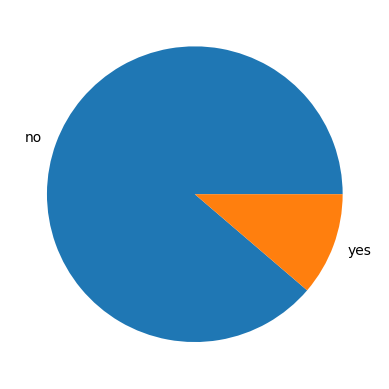

In [59]:
d = np.array([36548,4640])
l=["no","yes"]

plt.pie(d,labels=l)

#  LogisticRegression


[[ 1434   306  1181]
 [   84  3596  2080]
 [ 3804  4903 12612]]
Print Class: 0
TP=1434, FN=1487, TN=23191, FP=3888
Accuracy: 0.821
Precision: 0.269
Sensitivity: 0.491
F1-Score: 0.348
Specificity: 0.856
Balanced Accuracy: 0.674
MCC: 0.27

Print Class: 1
TP=3596, FN=2164, TN=19031, FP=5209
Accuracy: 0.754
Precision: 0.408
Sensitivity: 0.624
F1-Score: 0.494
Specificity: 0.785
Balanced Accuracy: 0.704
MCC: 0.354

Print Class: 2
TP=12612, FN=8707, TN=5420, FP=3261
Accuracy: 0.601
Precision: 0.795
Sensitivity: 0.592
F1-Score: 0.678
Specificity: 0.624
Balanced Accuracy: 0.608
MCC: 0.196

Overall Performance Prediction:
Accuracy: 72.5333%
Precision: 49.0667%
Recall or Sensitivity: 56.9%
F1-Score: 0.5067
Specificity or True Nagative Rate: 75.5%
Balanced Accuracy: 66.2%

MCC: 0.2733

roc_auc_score: 0.744


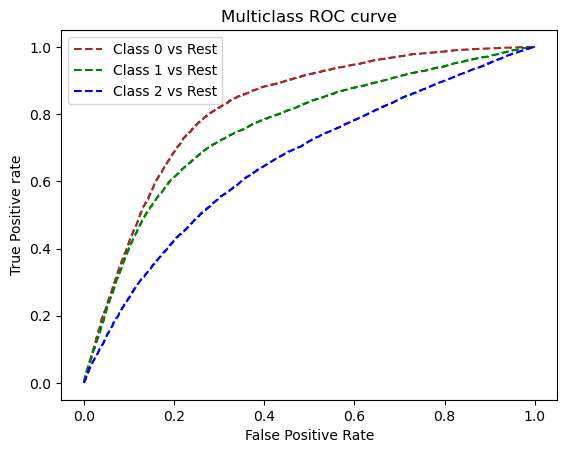

In [60]:
from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

#  DecisionTreeClassifier

[[ 3066   370  1918]
 [  394  5511  2830]
 [ 1862  2924 11125]]
Print Class: 0
TP=3066, FN=2288, TN=22390, FP=2256
Accuracy: 0.849
Precision: 0.576
Sensitivity: 0.573
F1-Score: 0.574
Specificity: 0.908
Balanced Accuracy: 0.74
MCC: 0.482

Print Class: 1
TP=5511, FN=3224, TN=17971, FP=3294
Accuracy: 0.783
Precision: 0.626
Sensitivity: 0.631
F1-Score: 0.628
Specificity: 0.845
Balanced Accuracy: 0.738
MCC: 0.475

Print Class: 2
TP=11125, FN=4786, TN=9341, FP=4748
Accuracy: 0.682
Precision: 0.701
Sensitivity: 0.699
F1-Score: 0.7
Specificity: 0.663
Balanced Accuracy: 0.681
MCC: 0.362

Overall Performance Prediction:
Accuracy: 77.1333%
Precision: 63.4333%
Recall or Sensitivity: 63.4333%
F1-Score: 0.634
Specificity or True Nagative Rate: 80.5333%
Balanced Accuracy: 71.9667%

MCC: 0.4397

roc_auc_score: 0.719


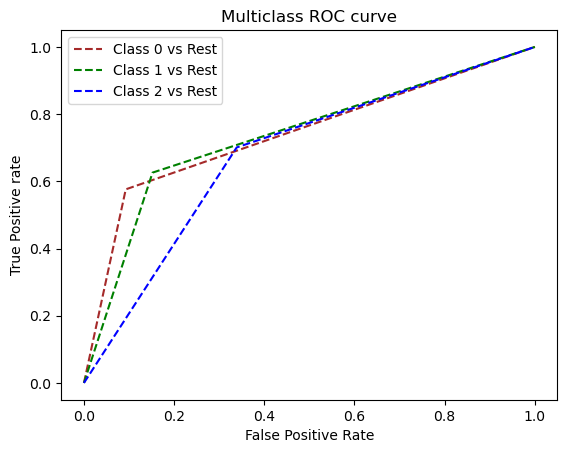

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Create an object for model

MHealthDT = DecisionTreeClassifier(random_state=0)

# Train the model with training data

MHealthDT = MHealthDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthDT.predict(x_test)
y_pred_prob = MHealthDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

# RandomForestClassifier

[[ 1434   306  1181]
 [   84  3596  2080]
 [ 3804  4903 12612]]
Print Class: 0
TP=1434, FN=1487, TN=23191, FP=3888
Accuracy: 0.821
Precision: 0.269
Sensitivity: 0.491
F1-Score: 0.348
Specificity: 0.856
Balanced Accuracy: 0.674
MCC: 0.27

Print Class: 1
TP=3596, FN=2164, TN=19031, FP=5209
Accuracy: 0.754
Precision: 0.408
Sensitivity: 0.624
F1-Score: 0.494
Specificity: 0.785
Balanced Accuracy: 0.704
MCC: 0.354

Print Class: 2
TP=12612, FN=8707, TN=5420, FP=3261
Accuracy: 0.601
Precision: 0.795
Sensitivity: 0.592
F1-Score: 0.678
Specificity: 0.624
Balanced Accuracy: 0.608
MCC: 0.196

Overall Performance Prediction:
Accuracy: 72.5333%
Precision: 49.0667%
Recall or Sensitivity: 56.9%
F1-Score: 0.5067
Specificity or True Nagative Rate: 75.5%
Balanced Accuracy: 66.2%

MCC: 0.2733

roc_auc_score: 0.744


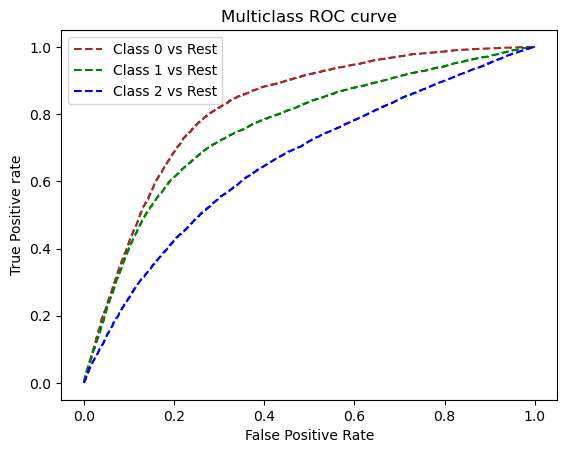

In [62]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal RandomForestClassifier' model with random sampling

from sklearn.ensemble import RandomForestClassifier
# Create an object for model

MHealthRF =  RandomForestClassifier()

# Train the model with training data

MHealthRF = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthRF.predict(x_test)
y_pred_prob = MHealthRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# ExtraTreesClassifier

[[ 3547   394  1494]
 [   52  6106  1936]
 [ 1723  2305 12443]]
Print Class: 0
TP=3547, FN=1888, TN=22790, FP=1775
Accuracy: 0.878
Precision: 0.666
Sensitivity: 0.653
F1-Score: 0.659
Specificity: 0.928
Balanced Accuracy: 0.79
MCC: 0.585

Print Class: 1
TP=6106, FN=1988, TN=19207, FP=2699
Accuracy: 0.844
Precision: 0.693
Sensitivity: 0.754
F1-Score: 0.723
Specificity: 0.877
Balanced Accuracy: 0.816
MCC: 0.615

Print Class: 2
TP=12443, FN=4028, TN=10099, FP=3430
Accuracy: 0.751
Precision: 0.784
Sensitivity: 0.755
F1-Score: 0.769
Specificity: 0.746
Balanced Accuracy: 0.75
MCC: 0.5

Overall Performance Prediction:
Accuracy: 82.4333%
Precision: 71.4333%
Recall or Sensitivity: 72.0667%
F1-Score: 0.717
Specificity or True Nagative Rate: 85.0333%
Balanced Accuracy: 78.5333%

MCC: 0.5667

roc_auc_score: 0.876


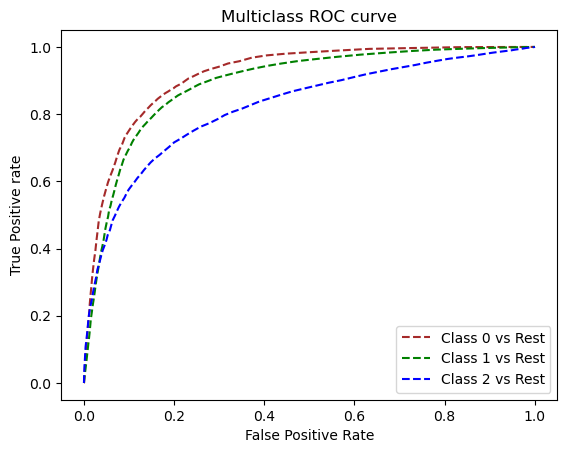

In [63]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal ExtraTreesClassifier' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

MHealthET = ExtraTreesClassifier()

# Train the model with training data

MHealthET = MHealthET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthET.predict(x_test)
y_pred_prob = MHealthET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# KNeighborsClassifier

[[ 2804   869  2376]
 [  408  4492  3019]
 [ 2110  3444 10478]]
Print Class: 0
TP=2804, FN=3245, TN=21433, FP=2518
Accuracy: 0.808
Precision: 0.527
Sensitivity: 0.464
F1-Score: 0.493
Specificity: 0.895
Balanced Accuracy: 0.68
MCC: 0.376

Print Class: 1
TP=4492, FN=3427, TN=17768, FP=4313
Accuracy: 0.742
Precision: 0.51
Sensitivity: 0.567
F1-Score: 0.537
Specificity: 0.805
Balanced Accuracy: 0.686
MCC: 0.36

Print Class: 2
TP=10478, FN=5554, TN=8573, FP=5395
Accuracy: 0.635
Precision: 0.66
Sensitivity: 0.654
F1-Score: 0.657
Specificity: 0.614
Balanced Accuracy: 0.634
MCC: 0.267

Overall Performance Prediction:
Accuracy: 72.8333%
Precision: 56.5667%
Recall or Sensitivity: 56.1667%
F1-Score: 0.5623
Specificity or True Nagative Rate: 77.1333%
Balanced Accuracy: 66.6667%

MCC: 0.3343

roc_auc_score: 0.743


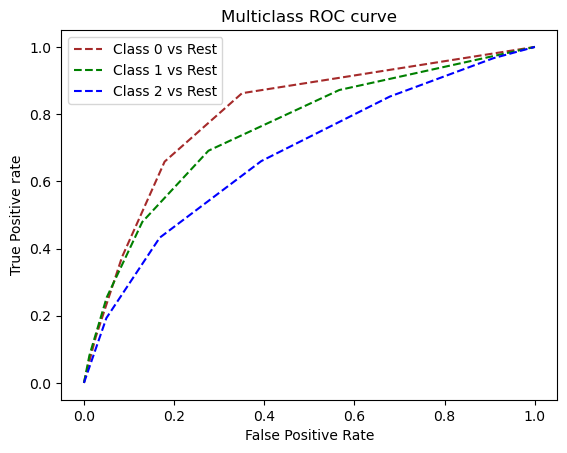

In [64]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal KNeighborsClassifier' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

MHealthKNN = KNeighborsClassifier(n_neighbors=5)

# Train the model with training data

MHealthKNN = MHealthKNN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthKNN.predict(x_test)
y_pred_prob = MHealthKNN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# naiveBayes 

[[ 2689   761  2801]
 [  116  4714  2871]
 [ 2517  3330 10201]]
Print Class: 0
TP=2689, FN=3562, TN=21116, FP=2633
Accuracy: 0.794
Precision: 0.505
Sensitivity: 0.43
F1-Score: 0.465
Specificity: 0.889
Balanced Accuracy: 0.66
MCC: 0.339

Print Class: 1
TP=4714, FN=2987, TN=18208, FP=4091
Accuracy: 0.764
Precision: 0.535
Sensitivity: 0.612
F1-Score: 0.571
Specificity: 0.817
Balanced Accuracy: 0.714
MCC: 0.411

Print Class: 2
TP=10201, FN=5847, TN=8280, FP=5672
Accuracy: 0.616
Precision: 0.643
Sensitivity: 0.636
F1-Score: 0.639
Specificity: 0.593
Balanced Accuracy: 0.614
MCC: 0.229

Overall Performance Prediction:
Accuracy: 72.4667%
Precision: 56.1%
Recall or Sensitivity: 55.9333%
F1-Score: 0.5583
Specificity or True Nagative Rate: 76.6333%
Balanced Accuracy: 66.2667%

MCC: 0.3263

roc_auc_score: 0.744


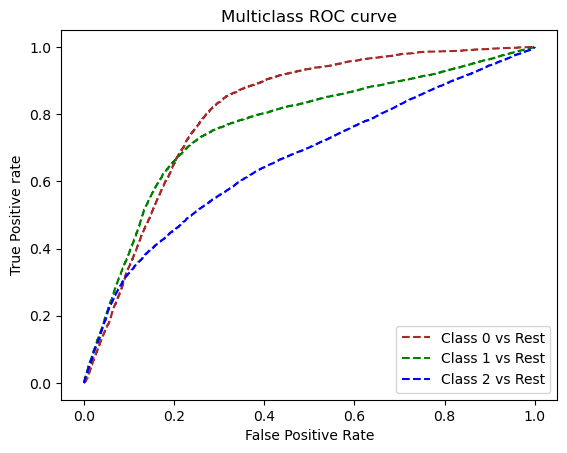

In [65]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal GaussianNB' model with random sampling

from sklearn.naive_bayes import GaussianNB

# Create an object for model

MHealthGNB = GaussianNB()

# Train the model with training data

MHealthGNB = MHealthGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthGNB.predict(x_test)
y_pred_prob = MHealthGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
EMResults=pd.read_csv(r"C:\Users\Dlc\Desktop\test.csv",header=0)
EMResults.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# comparision

Model Name:  LogisticRegression()
Confusion matrix : 
 [[3594  304]
 [  84 1428]]
Outcome values : 
 3594 304 84 1428
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.41      0.49      8805
           0       0.49      0.27      0.35      5322

   micro avg       0.58      0.36      0.44     14127
   macro avg       0.56      0.34      0.42     14127
weighted avg       0.57      0.36      0.44     14127

Accuracy : 92.8 %
Precision : 97.7 %
Recall : 92.2 %
F1 Score : 0.949
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 93.3 %
MCC : 0.833
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[5524  386]
 [ 374 3054]]
Outcome values : 
 5524 386 374 3054
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.63      0.63      8805
           0       0.57      0.57      0.57      5322

   micro avg       0.61      0.61      0.61     14127
   macro a

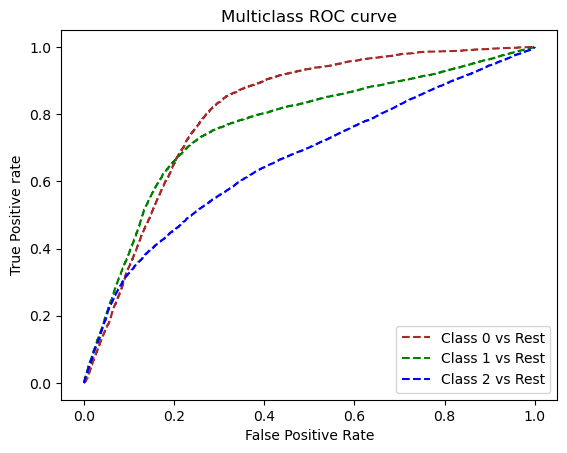

In [67]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=10)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    
    # ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
    
    

Model Name:  LogisticRegression()
Confusion matrix : 
 [[3594  304]
 [  84 1428]]
Outcome values : 
 3594 304 84 1428
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.41      0.49      8805
           0       0.49      0.27      0.35      5322

   micro avg       0.58      0.36      0.44     14127
   macro avg       0.56      0.34      0.42     14127
weighted avg       0.57      0.36      0.44     14127

Accuracy : 92.8 %
Precision : 97.7 %
Recall : 92.2 %
F1 Score : 0.949
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 93.3 %
MCC : 0.833
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[5548  380]
 [ 371 3069]]
Outcome values : 
 5548 380 371 3069
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.63      0.63      8805
           0       0.57      0.58      0.57      5322

   micro avg       0.61      0.61      0.61     14127
   macro a

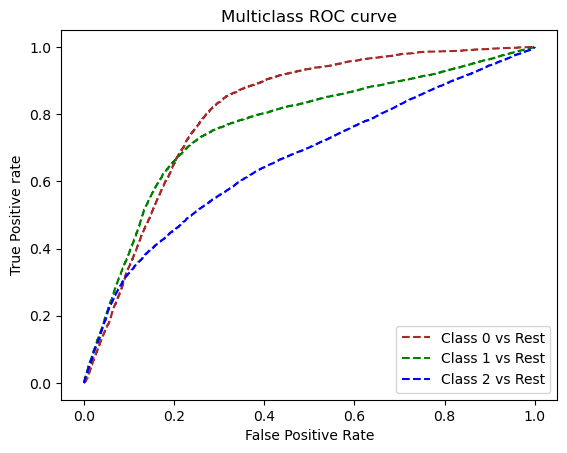

In [68]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
     # ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
    
    

   

In [69]:

y_pred1=MHealthET.predict(x_test)

# Results

In [71]:
Results = pd.DataFrame({'Creditscore_A':y_test, 'Creditscore_P':y_pred1})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = mytrain_bk1.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Creditscore_A,Creditscore_P
39269,0xfc17,CUS_0xa8d,June,Adomaitish,39,685-12-6865,Lawyer,74063.28,6201.9400,3,6,1508,2,"Payday Loan, and Auto Loan",9,18,13.91,10.0,Standard,1040.09,41.664387,18 Years and 2 Months,NM,117.436140,260.8532586189165,Low_spent_Medium_value_payments,521.9046015328237,Standard,2,2
25684,0xac7e,CUS_0x641f,May,Bradenz,35,568-09-2850,Writer,106077.6,8744.8000,3,5,733,4,"Home Equity Loan, Home Equity Loan, Payday Loa...",14,11,7.79,5.0,Standard,301.46,31.861799,20 Years and 6 Months,Yes,322.302213,349.25042577244386,Low_spent_Large_value_payments,472.92736111078295,Poor,1,2
42475,0x10ee1,CUS_0xaf67,April,Conort,55,210-84-4357,Developer,91432.44,7840.3700,4,2,3151,3,"Not Specified, Not Specified, and Debt Consoli...",13,12,5.06,4.0,Good,1279.64,27.936754,30 Years and 4 Months,No,183.206841,140.07018258338965,High_spent_Large_value_payments,700.7599766371892,Good,0,0
86502,0x210d8,CUS_0x8681,July,Agrawalh,28,539-50-5278,Lawyer,38791.68,3265.6400,6,9,30,9,"Debt Consolidation Loan, Auto Loan, Credit-Bui...",22,NaN,3.44,13.0,_,3772.55,25.513726,2 Years and 11 Months,Yes,197.661303,254.3924082234576,Low_spent_Medium_value_payments,154.51028838908258,Standard,2,1
49722,0x13958,CUS_0xb57b,March,Joseph Axp,47,891-87-0301,Accountant,22407.57,1677.2975,912,3,13,1,Personal Loan,6,11,2.6500000000000004,4.0,Standard,359.41,36.865817,30 Years and 4 Months,No,9.406580,45.48322050377099,High_spent_Medium_value_payments,362.83994965859114,Standard,2,2
